In [1]:
from math import erf, sqrt, pi, exp

# Тестирование гипотезы
def hypothesis_test(x, n, p0=4 / 8, pa=3 / 8):
    """
    Функция для проверки гипотезы.
    Параметры:
        n  - количество часов работы плиточника.
        p0 - вероятность в нулевой гипотезе (например, 4/8, что соответствует выкладке 4 кв. метров за час).
        pa - вероятность в альтернативной гипотезе (например, 3/8, что соответствует выкладке 3 кв. метров за час).
    Возвращает:
        p-value или False в случае, если нулевая гипотеза не опровергается.
    """
    alpha = 0.05  # Уровень значимости (вероятность ошибки первого рода)
    beta = 0.9  # Мощность проверки (вероятность не допустить ошибки второго рода)

    # Вычисляем математическое ожидание для нулевой и альтернативной гипотез
    mean0 = n * p0  # Мат. ожидание при нулевой гипотезе
    mean1 = n * pa  # Мат. ожидание при альтернативной гипотезе

    # Вычисляем стандартное отклонение для обеих гипотез
    std_dev0 = sqrt(n * p0 * (1 - p0))  # Стандартное отклонение при нулевой гипотезе
    std_deva = sqrt(n * pa * (1 - pa))  # Стандартное отклонение при альтернативной гипотезе

    # Находим критические точки (границы отклонения) для нулевой гипотезы
    lower_bound = inv_f_norm(alpha / 2, mean0, std_dev0)  # Нижняя критическая точка
    upper_bound = 2 * mean0 - lower_bound  # Верхняя критическая точка

    # Вычисляем мощность проверки
    test_power = (1 - f_norm(upper_bound, mean1, std_deva) +
                  f_norm(lower_bound, mean1, std_deva))

    # Вычисляем p-value для теста
    p = p_value(x / 8, mean0, std_dev0)

    # Если p-value больше уровня значимости и мощность проверки >= beta, нулевая гипотеза не отвергается
    if p >= alpha and test_power >= beta:
        print("Нулевая гипотеза не опровергнута")  # Гипотеза не опровергнута
        print(f"Мощность проверки равна {test_power}")  # Выводим мощность проверки
        return p  # Возвращаем p-value
    return False  # Если гипотеза отвергнута, возвращаем False

# Функция для расчета количества часов для выкладки плитки
def determine_tile_hours(j):
    for i in range(100, 10000):  # Перебираем количество часов от 100 до 10000
        hypothesis3 = hypothesis_test(j, i, 3 / 8, 4 / 8)  # Проверяем гипотезу для 3 кв. м/час
        hypothesis4 = hypothesis_test(j, i)  # Проверяем гипотезу для 4 кв. м/час

        # Если обе гипотезы верны, сравниваем их p-value
        if bool(hypothesis3) and bool(hypothesis4) and hypothesis3 > hypothesis4:
            print(f"Верны обе теории. Плиточник выкладывает 3 кв метра плитки в час\nКоличество часов {i}")
            break
        elif bool(hypothesis3) and bool(hypothesis4):
            print(f"Верны обе теории. Плиточник выкладывает 4 кв метра плитки в час\nКоличество часов {i}")
            break

        # Если верна только одна гипотеза
        if bool(hypothesis4):
            print(f"Плиточник выкладывает 4 кв метра плитки в час\nКоличество часов {i}")
            break
        if bool(hypothesis3):
            print(f"Плиточник выкладывает 3 кв метра плитки в час\nКоличество часов {i}")
            break

# Нормальное распределение (CDF)
def f_norm(x, mu=0, s=1):
    """
    Вычисляет функцию распределения (CDF) для нормального распределения.
    Параметры:
        x  - значение случайной величины.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
    Возвращает:
        Значение функции распределения для заданного x.
    """
    return (1 + erf((x - mu) / sqrt(2) / s)) / 2


    
# Плотность вероятности нормального распределения (PDF)
def rho_norm(x, mu=0, s=1):
    """
    Вычисляет плотность вероятности (PDF) для нормального распределения.
    Параметры:
        x  - значение случайной величины.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
    Возвращает:
        Значение плотности вероятности для заданного x.
    """
    return 1 / sqrt(2 * pi * s) * exp(-(x - mu) ** 2 / (2 * s ** 2))

# Вероятность ошибки первого рода (p-value)
def p_value(x, mu=0, s=1):
    """
    Вычисляет p-value, вероятность ошибки первого рода.
    Параметры:
        x  - наблюдаемое значение.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
    Возвращает:
        p-value.
    """
    return 2 * (1 - f_norm(x, mu, s)) if x >= mu else 2 * f_norm(x, mu, s)

# Обратная функция распределения (inverse CDF)
def inv_f_norm(p, mu, s, t=0.001):
    """
    Вычисляет обратную функцию распределения (inverse CDF) для нормального распределения.
    Параметры:
        p  - вероятность.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
        t  - точность вычисления (по умолчанию 0.001).
    Возвращает:
        Значение x, такое что CDF(x) = p.
    """
    if mu != 0 or s != 1:
        return mu + s * inv_f_norm(p, 0, 1, t)  # Приводим к стандартной форме, если mu != 0 или s != 1

    # Определяем границы поиска
    low_x, low_p = -100, 0
    hi_x, hi_p = 100, 1

    # Используем бинарный поиск для нахождения x с требуемой точностью
    while hi_x - low_x > t:
        mid_x = (low_x + hi_x) / 2
        mid_p = f_norm(mid_x)
        if mid_p < p:
            low_x, low_p = mid_x, mid_p
        elif mid_p > p:
            hi_x, hi_p = mid_x, mid_p
        else:
            break
    return mid_x


from math import erf, sqrt, pi, exp


# Тестирование гипотезы
def hypothesis_test(x, n, p0=4 / 8, pa=3 / 8):
    """
    Функция для проверки гипотезы.
    Параметры:
        n  - количество часов работы плиточника.
        p0 - вероятность в нулевой гипотезе (например, 4/8, что соответствует выкладке 4 кв. метров за час).
        pa - вероятность в альтернативной гипотезе (например, 3/8, что соответствует выкладке 3 кв. метров за час).
    Возвращает:
        p-value или False в случае, если нулевая гипотеза не опровергается.
    """
    alpha = 0.05  # Уровень значимости (вероятность ошибки первого рода)
    beta = 0.9  # Мощность проверки (вероятность не допустить ошибки второго рода)

    # Вычисляем математическое ожидание для нулевой и альтернативной гипотез
    mean0 = n * p0  # Мат. ожидание при нулевой гипотезе
    mean1 = n * pa  # Мат. ожидание при альтернативной гипотезе

    # Вычисляем стандартное отклонение для обеих гипотез
    std_dev0 = sqrt(n * p0 * (1 - p0))  # Стандартное отклонение при нулевой гипотезе
    std_deva = sqrt(n * pa * (1 - pa))  # Стандартное отклонение при альтернативной гипотезе

    # Находим критические точки (границы отклонения) для нулевой гипотезы
    lower_bound = inv_f_norm(alpha / 2, mean0, std_dev0)  # Нижняя критическая точка
    upper_bound = 2 * mean0 - lower_bound  # Верхняя критическая точка

    # Вычисляем мощность проверки
    test_power = (1 - f_norm(upper_bound, mean1, std_deva) +
                  f_norm(lower_bound, mean1, std_deva))

    # Вычисляем p-value для теста
    p = p_value(x / 8, mean0, std_dev0)

    # Если p-value больше уровня значимости и мощность проверки >= beta, нулевая гипотеза не отвергается
    if p >= alpha and test_power >= beta:
        print("Нулевая гипотеза не опровергнута")  # Гипотеза не опровергнута
        print(f"Мощность проверки равна {test_power}")  # Выводим мощность проверки
        return p  # Возвращаем p-value
    return False  # Если гипотеза отвергнута, возвращаем False


# Функция для расчета количества часов для выкладки плитки
def determine_tile_hours(j):
    for i in range(100, 10000):  # Перебираем количество часов от 100 до 10000
        hypothesis3 = hypothesis_test(j, i, 3 / 8, 4 / 8)  # Проверяем гипотезу для 3 кв. м/час
        hypothesis4 = hypothesis_test(j, i)  # Проверяем гипотезу для 4 кв. м/час

        # Если обе гипотезы верны, сравниваем их p-value
        if bool(hypothesis3) and bool(hypothesis4) and hypothesis3 > hypothesis4:
            print(f"Верны обе теории. Плиточник выкладывает 3 кв метра плитки в час\nКоличество часов {i}")
            break
        elif bool(hypothesis3) and bool(hypothesis4):
            print(f"Верны обе теории. Плиточник выкладывает 4 кв метра плитки в час\nКоличество часов {i}")
            break

        # Если верна только одна гипотеза
        if bool(hypothesis4):
            print(f"Плиточник выкладывает 4 кв метра плитки в час\nКоличество часов {i}")
            break
        if bool(hypothesis3):
            print(f"Плиточник выкладывает 3 кв метра плитки в час\nКоличество часов {i}")
            break


# Нормальное распределение (CDF)
def f_norm(x, mu=0, s=1):
    """
    Вычисляет функцию распределения (CDF) для нормального распределения.
    Параметры:
        x  - значение случайной величины.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
    Возвращает:
        Значение функции распределения для заданного x.
    """
    return (1 + erf((x - mu) / sqrt(2) / s)) / 2


# Плотность вероятности нормального распределения (PDF)
def rho_norm(x, mu=0, s=1):
    """
    Вычисляет плотность вероятности (PDF) для нормального распределения.
    Параметры:
        x  - значение случайной величины.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
    Возвращает:
        Значение плотности вероятности для заданного x.
    """
    return 1 / sqrt(2 * pi * s) * exp(-(x - mu) ** 2 / (2 * s ** 2))


# Вероятность ошибки первого рода (p-value)
def p_value(x, mu=0, s=1):
    """
    Вычисляет p-value, вероятность ошибки первого рода.
    Параметры:
        x  - наблюдаемое значение.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
    Возвращает:
        p-value.
    """
    return 2 * (1 - f_norm(x, mu, s)) if x >= mu else 2 * f_norm(x, mu, s)


# Обратная функция распределения (inverse CDF)
def inv_f_norm(p, mu, s, t=0.001):
    """
    Вычисляет обратную функцию распределения (inverse CDF) для нормального распределения.
    Параметры:
        p  - вероятность.
        mu - математическое ожидание (среднее).
        s  - стандартное отклонение.
        t  - точность вычисления (по умолчанию 0.001).
    Возвращает:
        Значение x, такое что CDF(x) = p.
    """
    if mu != 0 or s != 1:
        return mu + s * inv_f_norm(p, 0, 1, t)  # Приводим к стандартной форме, если mu != 0 или s != 1

    # Определяем границы поиска
    low_x, low_p = -100, 0
    hi_x, hi_p = 100, 1

    # Используем бинарный поиск для нахождения x с требуемой точностью
    while hi_x - low_x > t:
        mid_x = (low_x + hi_x) / 2
        mid_p = f_norm(mid_x)
        if mid_p < p:
            low_x, low_p = mid_x, mid_p
        elif mid_p > p:
            hi_x, hi_p = mid_x, mid_p
        else:
            break
    return mid_x

def main():
    determine_tile_hours(700)

# Запуск программы
if __name__ == "__main__":
    main()


Нулевая гипотеза не опровергнута
Мощность проверки равна 0.9001293479680719
Плиточник выкладывает 4 кв метра плитки в час
Количество часов 164


Лучшее p-значение: 0.00539723189794894
Соответствующее w-значение: 0.049996789051411694


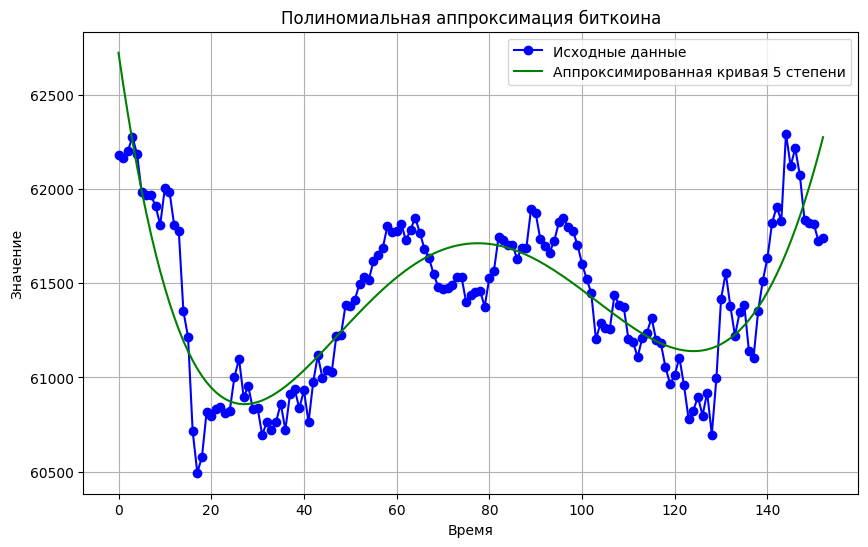

In [4]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import solve as gauss
from math import sqrt, erf, pi, exp
from statistics import mean

# Функция для вычисления значений кумулятивной функции нормального распределения
def f_norm(x, mu=0, s=1):
    return (1 + erf(
        (x - mu) / sqrt(2) / s)) / 2  # Используем функцию ошибки (erf) для вычисления кумулятивной вероятности

# Функция для вычисления плотности нормального распределения
def rho_norm(x, mu=0, s=1):
    # Формула плотности нормального распределения
    return 1 / sqrt(2 * pi * s) * exp(-(x - mu) ** 2 / 2 / s ** 2)

# Функция для вычисления p-значения (вероятность ошибки первого рода)
def p_value(x, mu=0, s=1):
    # Если значение больше или равно среднему, то возвращаем вероятность того, что оно выше этого значения
    return 2 * (1 - f_norm(x, mu, s)) if x >= mu else 2 * f_norm(x, mu, s)


# Функция для нахождения обратного значения кумулятивной функции нормального распределения
def inv_f_norm(p, mu, s, t=0.001):
    # Если mu и s не равны значениям по умолчанию (0 и 1), трансформируем аргументы
    if mu != 0 or s != 1:
        return mu + s * inv_f_norm(p, 0, 1, t)
    # Начальные границы поиска
    low_x, low_p = -100, 0
    hi_x, hi_p = 100, 1
    # Итеративный бинарный поиск для нахождения x, при котором кумулятивная вероятность приближается к p
    while hi_x - low_x > t:
        mid_x = (low_x + hi_x) / 2  # Средняя точка между границами
        mid_p = f_norm(mid_x)  # Кумулятивная вероятность в этой точке
        if mid_p < p:  # Если вероятность меньше, поднимаем нижнюю границу
            low_x, low_p = mid_x, mid_p
        elif mid_p > p:  # Если вероятность больше, опускаем верхнюю границу
            hi_x, hi_p = mid_x, mid_p
        else:
            break  # Если вероятность совпадает, прекращаем поиск
    return mid_x  # Возвращаем найденное значение x


# Функция для получения данных о цене биткоина с сайта
def fetch_bitcoin_data(prices=[]):
    url = 'https://cryptocharts.ru/bitcoin-dollar/'  # URL сайта с данными
    response = requests.get(url)  # Делаем HTTP-запрос к сайту
    html_content = response.text  # Получаем HTML-код страницы

    # Создаем объект BeautifulSoup для парсинга HTML-кода
    soup = BeautifulSoup(html_content, 'html.parser')

    # Ищем таблицу с классом 'TableRates', содержащую данные о цене биткоина
    table_class = 'TableRates'
    table = soup.find('table', class_=table_class)

    # Проходим по всем строкам таблицы
    rows = table.find_all('tr')
    for row in rows:
        # Проходим по всем ячейкам таблицы
        cells = row.find_all('td')
        # Берем каждую вторую ячейку (цены) и добавляем ее в список
        for cell in cells[1::2]:
            prices.insert(0, cell.text.strip())  # Добавляем данные в начало списка


# Функция для вычисления дисперсии данных (среднее значение квадратов)
def calculate_variance(data):
    return mean(list(map(lambda value: value ** 2, data)))  # Вычисляем квадраты значений и берем их среднее


# Функция для вычисления стандартного отклонения
def calculate_standard_deviation(data):
    return sqrt(calculate_variance(data))  # Стандартное отклонение — это корень квадратный из дисперсии


# Функция для нахождения максимального по модулю значения в списке
def find_max_by_absolute_value(numbers: list[float]) -> float:
    max_number = 0  # Инициализируем переменную для хранения максимального значения
    # Проходим по каждому числу в списке
    for number in numbers:
        if abs(number) > abs(max_number):  # Сравниваем модули чисел
            max_number = number  # Если текущее значение больше, обновляем переменную
    return abs(max_number)  # Возвращаем наибольшее по модулю число


# Функция для полиномиальной аппроксимации (нахождение коэффициентов полинома)
def polynomial_approximation(y_values, x_values, degree):
    matrix = [[] for _ in range(degree + 1)]  # Создаем матрицу для системы уравнений
    constants = []  # Список для хранения свободных членов (значений)
    # Заполняем матрицу коэффициентов системы уравнений
    for i in range(degree + 1):
        for j in range(degree + 1):
            matrix[i].append(sum(list(map(lambda x: x ** (i + j), x_values))))  # Суммируем степени x
        constants.append(sum(y * x ** i for y, x in zip(y_values, x_values)))  # Заполняем свободные члены
    # Решаем систему линейных уравнений для нахождения коэффициентов полинома
    coefficients = gauss(np.array(matrix, dtype="float64"), np.array(constants, dtype="float64"))
    return coefficients  # Возвращаем коэффициенты полинома


# Функция для проведения статистического теста и нахождения лучшего полинома
def run_statistical_test(y_values, degree):
    alpha = 0.05  # Уровень значимости для теста
    data = y_values.copy()  # Копируем данные
    x_values = list(range(len(data)))  # Генерируем x-значения (индексы данных)

    # Полиномиальная аппроксимация данных двумя методами (0 и 1)
    coefficients_0 = polynomial_approximation(data, x_values, degree)
    coefficients_1 = polynomial_approximation(data, x_values, degree)

    # Вычисляем аппроксимированные значения для обеих аппроксимаций
    approximated_0 = [sum(coefficients_0[i] * x ** i for i in range(len(coefficients_0))) for x in x_values]
    approximated_1 = [sum(coefficients_1[i] * x ** i for i in range(len(coefficients_1))) for x in x_values]

    # Вычисляем остатки (разница между реальными данными и аппроксимированными значениями)
    residuals_0 = [approximated_0[i] - data[i] for i in range(len(data))]
    residuals_1 = [approximated_1[i] - data[i] for i in range(len(data))]

    # Вычисляем среднее и стандартное отклонение остатков
    mean_residual_0 = mean(residuals_0)
    mean_residual_1 = mean(residuals_1)
    std_dev_0 = calculate_standard_deviation(residuals_0)
    std_dev_1 = calculate_standard_deviation(residuals_1)

    # Нахождение наибольшего остатка по модулю
    max_deviation_0 = find_max_by_absolute_value([residual - mean_residual_0 for residual in residuals_0])

    # Вычисляем границы и p-значение
    lower_bound = inv_f_norm(alpha / 2, mean_residual_0, std_dev_0)
    upper_bound = 2 * mean_residual_0 - lower_bound
    return p_value(max_deviation_0 + mean_residual_0, 0, std_dev_0), approximated_0, 1 - f_norm(upper_bound,
                                                                                                mean_residual_1,
                                                                                                std_dev_1) + f_norm(
        lower_bound, mean_residual_1, std_dev_1)


# Основная функция программы
def main():
    # Получаем данные о ценах на биткоин
    bitcoin_prices = []
    fetch_bitcoin_data(bitcoin_prices)
    bitcoin_prices = [float(price.replace(',', '.')) for price in bitcoin_prices]  # Преобразуем строки в числа

    best_p_value = -1  # Инициализируем лучшее p-значение
    best_degree = 0  # Инициализируем степень полинома
    best_w_stat = 0  # Инициализируем значение статистики w
    best_approximation = []  # Инициализируем лучший список аппроксимаций

    # Перебираем разные степени полинома для нахождения наилучшей аппроксимации
    for degree in range(5, 50):
        p_value, approximation, w_stat = run_statistical_test(bitcoin_prices, degree)
        if best_p_value < p_value:  # Обновляем лучший результат, если текущее p-значение лучше
            best_p_value = p_value
            best_w_stat = w_stat
            best_degree = degree
            best_approximation = approximation

    x_values = list(range(len(bitcoin_prices)))  # Генерируем x-значения для графика

    # Выводим лучшее найденное p-значение и w-статистику
    print(f"Лучшее p-значение: {best_p_value}")
    print(f"Соответствующее w-значение: {best_w_stat}")

    # Визуализация данных и аппроксимаций
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, bitcoin_prices, label='Исходные данные', marker='o', color='blue')
    plt.plot(x_values, best_approximation, label=f'Аппроксимированная кривая {best_degree} степени', color='green', linestyle='-')
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.title('Полиномиальная аппроксимация биткоина')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()
